# EXERCISE: Glass Identification (aka "Glassification")

## TASK 1: read the data into a DataFrame

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
df = pd.read_csv(url, names=col_names, index_col='id')

## TASK 2: briefly explore the data

In [4]:
%matplotlib notebook

In [3]:
df.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.corr()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
ri,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
k,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
glass_type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<IPython.core.display.Javascript object>


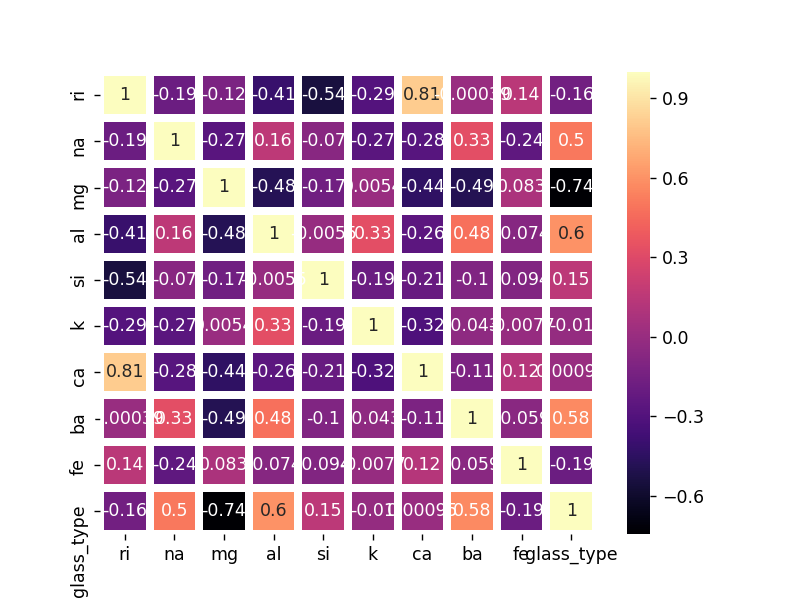

In [18]:
sns.heatmap(df.corr(),linecolor='w',linewidths=4,cmap='magma',annot=True)

## TASK 3: convert into binary classification problem 

Convert this into a binary classification problem. Create a new DataFrame column called "binary":
1.	If type of glass = 1/2/3/4, set binary = 0.
2.	If type of glass = 5/6/7, set binary = 1.

In [19]:
df['binary_glass'] = df.glass_type.map({1 :0, 2 :0, 3 :0, 4 :0, 5 :1, 6 :1, 7 :1})

## TASK 4: create a feature matrix (X) using all features 

In [20]:
feature_cols=['ri','na','mg','al','si','k','ca','ba','fe']

In [21]:
X = df[feature_cols]

## TASK 5: create a response vector (y)

In [22]:
y = df['binary_glass']

## TASK 6: split X and y into training and testing set

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [25]:
len(X_train)

128

In [26]:
len(X_test)

86

In [27]:
len(y_train)

128

In [28]:
len(y_test)

86

## TASK 7: fit a KNN model on the training set using K=5

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## TASK 8: make predictions on the testing set and calculate testing accuracy

In [32]:
y_pred = knn.predict(X_test)
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred))

0.918604651163


## TASK 9: write a for loop that computes testing accuracy for a range of K values

In [33]:
k_range = range(1, 51)
testing_accuracy = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    testing_accuracy.append(metrics.accuracy_score(y_test, y_pred))

In [34]:
testing_accuracy

[0.93023255813953487,
 0.88372093023255816,
 0.89534883720930236,
 0.89534883720930236,
 0.91860465116279066,
 0.89534883720930236,
 0.87209302325581395,
 0.87209302325581395,
 0.87209302325581395,
 0.87209302325581395,
 0.88372093023255816,
 0.87209302325581395,
 0.87209302325581395,
 0.87209302325581395,
 0.88372093023255816,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.89534883720930236,
 0.8953488

## TASK 10: plot K value versus testing accuracy to choose on optimal value for K

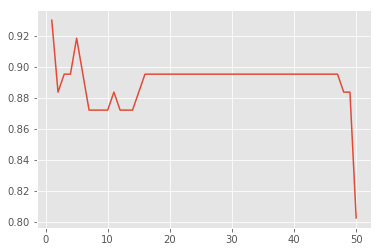

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(k_range, testing_accuracy)

## TASK 11: calculate the null accuracy (see instructions for explanation)

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
1 - y_test.mean()  

0.7674418604651163

## TASK 12: search for useful features

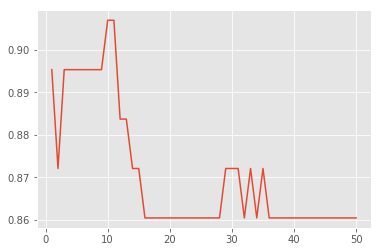

In [40]:
# redo exercise using only those features
feature_cols = ['mg','ba']
X = df[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
k_range = range(1, 51)
testing_accuracy = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    testing_accuracy.append(metrics.accuracy_score(y_test, y_pred))
testing_accuracy
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(k_range, testing_accuracy)

In [41]:
df.groupby('binary_glass').mean()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
binary_glass,,,,,,,,,,
0,1.518593,13.201718,3.294908,1.281656,72.586933,0.477485,8.924663,0.029816,0.067607,1.674847
1,1.517638,14.066667,0.733725,1.966667,72.855490,0.559608,9.060196,0.639216,0.023137,6.313725


<function matplotlib.pyplot.tight_layout>

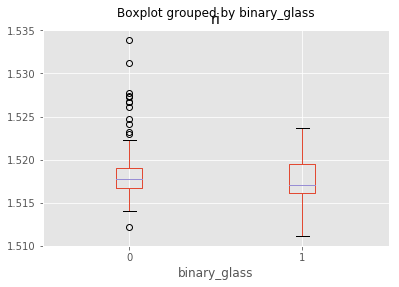

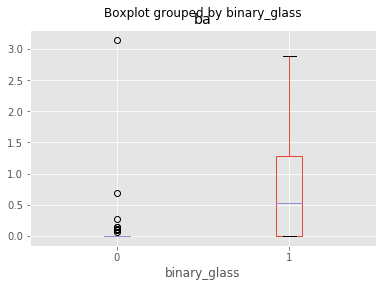

In [43]:
df.boxplot(column='ri', by='binary_glass')
df.boxplot(column='ba', by='binary_glass')
plt.tight_layout

In [48]:
df.corr()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,binary_glass
ri,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237,-0.134327
na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898,0.452336
mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993,-0.758289
al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829,0.585928
si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565,0.148072
k,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054,0.053774
ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952,0.040670
ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161,0.523403
fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278,-0.194903
glass_type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000,0.941680
